### Library

In [246]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
## sklearn.preprocessing.Imputer -> sklearn.impute.SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict
import os
# print(os.listdir("../input"))

### Load housing data

In [15]:
df_train = pd.read_csv("../../../data/raw/house/train.csv")
df_test = pd.read_csv("../../../data/raw/house/test.csv")

### Data Exploration

In [16]:
## sample train
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [17]:
#Show all columns
pd.options.display.max_columns = None
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [18]:
pd.options.display.max_columns = None
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [19]:
## 변수별 type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
## convert numeric to string
df_train["MSSubClass"] = df_train["MSSubClass"].apply(str)
df_train['YrSold'] = df_train['YrSold'].apply(str)
df_train['MoSold'] = df_train['MoSold'].apply(str)
# df_train.info()

### Missing Data

In [21]:
df_na = (df_train.isnull().sum() / len(df_train)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({"Missing Ratio": df_na})

df_na_cols = pd.DataFrame(df_train.dtypes)
missing_data = missing_data.join(df_na_cols, how = 'left')

In [22]:
# missing_data

In [23]:
len(missing_data)

19

## Profiling report

In [24]:
## profile report -> save html
from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train,
#                        explortative = True,
#                        )

pr = df_train.profile_report()

# pr.to_file('./data_profile/03_01_housing_profile.html')

## Target analysis
### Distribution of target is skewed -> Log transform

/Users/a420777/opt/anaconda3/envs/whatif/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a420777/opt/anaconda3/envs/whatif/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

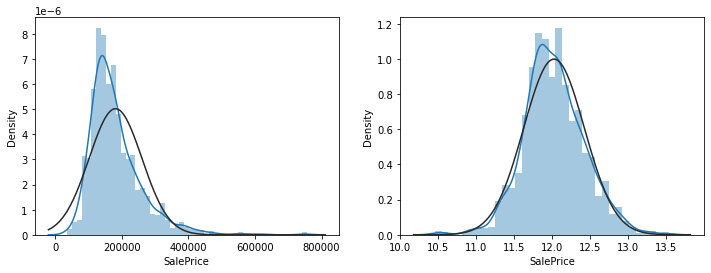

In [25]:
fig, ax = plt.subplots(1, 2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df_train['SalePrice'], ax = ax[0], fit = norm)
sns.distplot(np.log(df_train[('SalePrice')]+1), ax = ax[1], fit=norm)

## Data Engineering
+ Handling categoricals
+ Feature engineering - To generate new features

### Fill missing value

In [26]:
## Fill with the supplied value
def fill_missing(df, cols, val):
    for col in cols:
        df[col] = df[col].fillna(val)
        
## Fill with the mode
def fill_missing_with_mode(df, cols):
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
## log transform for columns
def add_log(res, cols):
    m = res.shape[1]
    for col in cols:
        res = res.assign(newcol = pd.Series(np.log(1.01 + res[col])).values)
        res.columns.values[m] = col + '_log'
        m +=1
    
    return res

In [27]:
cat_null_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu","GarageType", "GarageFinish", "GarageQual", "GarageCond",
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                "MasVnrType", "MSSubClass", "Electrical"]

num_null_cols = ['GarageYrBlt', 'MasVnrArea']

fill_missing(df_train, cat_null_cols, "None")
fill_missing(df_train, num_null_cols, 0)

# house co located are similar in size
df_train['LotFrontage'] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### Add new feature

In [28]:
## total square feet
df_train["TotalSF"] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

### Handle categorical value
+ EBM에선 categorical value를 dummy로 만드는게 역효과!!

In [29]:
# def dummy_encode(in_df_train):
#     df_train = in_df_train
#     categorical_features = [col  for col in df_train.columns if df_train[col].dtype == 'object']
#     print(categorical_features)
    
#     for f in categorical_features:
#         prefix = f
#         df_train = pd.concat([df_train, pd.get_dummies(df_train[f], prefix = prefix)], axis=1).drop(f,axis=1)
        
#     return df_train

In [30]:
# df_train = dummy_encode(df_train)
# print(df_train.shape)

## Modeling(EBM)

In [31]:
# interpretml EBM
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

X = df_train.drop(['Id', 'SalePrice'], axis= 1)
y = df_train.SalePrice

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [32]:
marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
# show(marginal)

In [33]:
# Explainable boosting regressor
ebm = ExplainableBoostingRegressor(random_state= 42)
ebm.fit(X_train, y_train)


ExplainableBoostingRegressor(feature_names=['MSSubClass', 'MSZoning',
                                            'LotFrontage', 'LotArea', 'Street',
                                            'Alley', 'LotShape', 'LandContour',
                                            'Utilities', 'LotConfig',
                                            'LandSlope', 'Neighborhood',
                                            'Condition1', 'Condition2',
                                            'BldgType', 'HouseStyle',
                                            'OverallQual', 'OverallCond',
                                            'YearBuilt', 'YearRemodAdd',
                                            'RoofStyle', 'RoofMatl',
                                            'Exterior1st', 'Exterior2nd',
                                            'MasVnrTy...
                                            'categorical', 'categorical',
                                            'categorical', 'cate

In [34]:
 #performance
from interpret.perf import RegressionPerf
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_valid, y_valid, name = 'EBM')
# show(ebm_perf)

In [67]:
# ebm global
ebm_global = ebm.explain_global(name = 'EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/140224827869264/ -->

In [36]:
# 시각화에 필요한 플롯팅 함수 정의

import plotly.graph_objects as go
from plotly.subplots import make_subplots

scores_range=(-98365.92454651206, 102145.65757499124)

def create_time_series(df, colname):
    
    dff=df[df.col_name==colname]
    trace1 = go.Line(
        x=dff['names'],
        y=dff['scores'],
        name='scores',
        marker=dict(
            color='rgb(34,163,192)',
            size=1),
        line_shape="vh",
        line_dash="solid"
    )
    trace2 = go.Scatter(
        x=dff['names'],
        y=dff['upper_bounds'],
        name='upper_bounds',
        marker=dict(
            color='rgb(12,100,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    trace3 = go.Scatter(
        x=dff['names'],
        y=dff['lower_bounds'],
        name='lower_bounds',
        marker=dict(
            color='rgb(200,1,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    fig = make_subplots()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)

    fig.update_xaxes(showgrid=False)
    fig.update_layout(height=400,width=400*1.618) # , yaxis_range=list(scores_range))
#     fig.show()
    
    return fig

In [403]:
import copy

In [404]:
global_internal_obj=copy.deepcopy(ebm_global._internal_obj)

In [405]:
# len(tar['names'])
# len(tar['scores'])
# len(tar['upper_bounds'])
# len(tar['lower_bounds'])

In [406]:
global_info_list=[]

In [407]:
global_data=global_internal_obj["specific"]

In [408]:
for i in range(X_train.shape[1]):
    
    col_name=X_train.columns[i]
    dtype=X_train[col_name].dtype
    
    tar=global_data[i]
    scores_range=tar.pop("scores_range")
    density=tar.pop("density")
    
    if len(tar['names'])!=len(tar['scores']):
        tar["names"]=tar["names"][:-1]
    
    tar=pd.DataFrame(tar)
    tar["col_name"]=col_name
    tar["dtype"]=dtype
    
    global_info_list.append(tar)
    

In [409]:
global_df=pd.concat(global_info_list,axis=0)

In [410]:
global_df["abs_scores"]=global_df.scores.apply(abs)

In [412]:
min_series=global_df.groupby("col_name").apply(lambda x: x.scores.min())

max_series=global_df.groupby("col_name").apply(lambda x: x.scores.max())

max_min_series=max_series-min_series

In [413]:
def max_min_excld_extrm_vals(x, col="", percent=0.05):
    top_05=x[col].quantile(1-percent)
    low_05=x[col].quantile(percent)
    x[col]=x[col][x[col]<=top_05]
    x[col]=x[col][x[col]>=low_05]
    return x[col].max()-x[col].min()

In [414]:
max_min_excld_extrm_vals_series=global_df.groupby("col_name").apply(max_min_excld_extrm_vals,col="scores", percent=0.05)

In [415]:
df=pd.concat([min_series,max_series,max_min_series, max_min_excld_extrm_vals_series],axis=1)

In [416]:
df.columns=["min","max","max_min_gap","max_min_gap_excld_extrm"]

In [417]:
FI_df=pd.DataFrame(list(zip(ebm.feature_names, ebm.feature_importances_)))

FI_df=FI_df.set_index(0)

In [418]:
df=df.merge(FI_df, right_index=True, left_index=True, how="left")

df.columns=["min","max","max_min_gap","max_min_gap_excld_extrm","feature_importance"]

In [419]:
df["std"]=global_df.groupby("col_name").apply(lambda x: x.scores.std())

In [420]:
df

min           max   max_min_gap  \
col_name                                                 
1stFlrSF      -7248.222307  17414.964657  24663.186965   
2ndFlrSF     -18298.743938  48880.292588  67179.036525   
3SsnPorch      -174.836780  28551.815436  28726.652216   
Alley         -2702.289025   2778.697672   5480.986697   
BedroomAbvGr  -2031.041135   9602.249022  11633.290157   
...                    ...           ...           ...   
Utilities         0.000000      0.000000      0.000000   
WoodDeckSF    -2211.334970   9324.983277  11536.318248   
YearBuilt     -7310.679107  11915.640508  19226.319615   
YearRemodAdd  -3137.311676   7632.683921  10769.995596   
YrSold        -1264.330254   1136.197847   2400.528101   

              max_min_gap_excld_extrm  feature_importance          std  
col_name                                                                
1stFlrSF                 17173.477703         2944.737840  4394.178292  
2ndFlrSF                  9468.552986         1521.887806  5470.096823  
3SsnPorch                24168.768185          343.685998  7839.575803  
Alley                        0.000000          203.597118  2740.495337  
BedroomAbvGr              6094.761003         1311.326802  4115.175102  
...                               ...                 ...          ...  
Utilities                    0.000000            0.000000     0.000000  
WoodDeckSF                7574.759404         1628.515505  2352.352282  
YearBuilt                 5035.315564         2266.415915  2607.644114  
YearRemodAdd              6103.672304         2581.068905  2988.624638  
YrSold                    1048.715044          745.970683   932.941756  

[80 rows x 6 columns]

In [131]:
# binning

In [421]:
global_df

type   names        scores  upper_bounds  lower_bounds    col_name  \
0    univariate     120  -1548.547577  -1197.375170  -1899.719984  MSSubClass   
1    univariate     160  -1667.297181  -1324.226371  -2010.367992  MSSubClass   
2    univariate     180  -1663.693430  -1323.529524  -2003.857337  MSSubClass   
3    univariate     190  -1308.552348  -1114.294216  -1502.810479  MSSubClass   
4    univariate      20  -1248.671956   -974.919966  -1522.423945  MSSubClass   
..          ...     ...           ...           ...           ...         ...   
250  univariate  4267.5  20481.735560  21489.108989  19474.362131     TotalSF   
251  univariate  4394.0  24740.308989  27406.034978  22074.582999     TotalSF   
252  univariate  4720.0  23778.414769  25146.573826  22410.255713     TotalSF   
253  univariate  5005.5  28778.555714  35311.518947  22245.592480     TotalSF   
254  univariate  5526.5  22207.117780  30507.852173  13906.383388     TotalSF   

      dtype    abs_scores  
0    object   1548.547577  
1    object   1667.297181  
2    object   1663.693430  
3    object   1308.552348  
4    object   1248.671956  
..      ...           ...  
250   int64  20481.735560  
251   int64  24740.308989  
252   int64  23778.414769  
253   int64  28778.555714  
254   int64  22207.117780  

[3938 rows x 8 columns]

In [424]:
global_df[global_df.dtype=="object"]

type    names       scores  upper_bounds  lower_bounds  \
0   univariate      120 -1548.547577  -1197.375170  -1899.719984   
1   univariate      160 -1667.297181  -1324.226371  -2010.367992   
2   univariate      180 -1663.693430  -1323.529524  -2003.857337   
3   univariate      190 -1308.552348  -1114.294216  -1502.810479   
4   univariate       20 -1248.671956   -974.919966  -1522.423945   
..         ...      ...          ...           ...           ...   
1   univariate  AdjLand  2635.612912   4209.977564   1061.248260   
2   univariate   Alloca  8493.365245  11851.195716   5135.534773   
3   univariate   Family -1860.947793    -56.204249  -3665.691336   
4   univariate   Normal   -88.035204    -33.293123   -142.777286   
5   univariate  Partial  4543.205439   4698.670633   4387.740246   

         col_name   dtype   abs_scores  
0      MSSubClass  object  1548.547577  
1      MSSubClass  object  1667.297181  
2      MSSubClass  object  1663.693430  
3      MSSubClass  object  1308.552348  
4      MSSubClass  object  1248.671956  
..            ...     ...          ...  
1   SaleCondition  object  2635.612912  
2   SaleCondition  object  8493.365245  
3   SaleCondition  object  1860.947793  
4   SaleCondition  object    88.035204  
5   SaleCondition  object  4543.205439  

[297 rows x 8 columns]

In [429]:
(global_df[global_df.col_name==col].dtype=="int64").all()

True

In [434]:
import warnings
warnings.filterwarnings("ignore")

In [444]:
col

'BsmtHalfBath'

In [440]:
top_range_info_dict={}
for col in df.index:
    if (global_df[global_df.col_name==col].dtype=="int64").all():
        top_range_info_dict[col]=get_top_range_info(col)
    else:
        pass

           type  names        scores  upper_bounds  lower_bounds  col_name  \
0    univariate    334  -6077.832129  -3866.947170  -8288.717089  1stFlrSF   
1    univariate    489  -6077.832129  -3866.947170  -8288.717089  1stFlrSF   
2    univariate    522  -6127.281513  -3825.492299  -8429.070727  1stFlrSF   
3    univariate    548  -6127.281513  -3825.492299  -8429.070727  1stFlrSF   
4    univariate    573  -6127.281513  -3825.492299  -8429.070727  1stFlrSF   
..          ...    ...           ...           ...           ...       ...   
250  univariate   2078  13718.399193  15162.853172  12273.945214  1stFlrSF   
251  univariate   2115  13718.399193  15162.853172  12273.945214  1stFlrSF   
252  univariate   2176  12935.320627  14601.569598  11269.071655  1stFlrSF   
253  univariate   2246  17414.964657  24713.722515  10116.206800  1stFlrSF   
254  univariate   2467  -7248.222307   6353.365352 -20849.809967  1stFlrSF   

     dtype    abs_scores  binning  
0    int64   6077.832129   

IndexError: single positional indexer is out-of-bounds

In [387]:
result

top_1_range               (683, 334)
top_1_range_max_min      1791.380217
top_1_range_gradient        5.132895
top_2_range               (764, 690)
top_2_range_max_min      2500.425975
top_2_range_gradient        33.78954
top_3_range             (1838, 1692)
top_3_range_max_min      7475.840059
top_3_range_gradient       51.204384
dtype: object

In [461]:

def get_top_range_info(colname,top_k=3):
    part_df=global_df[global_df.col_name==colname] #names.astype(int)

    part_df.loc[:,"names"]=part_df.loc[:,"names"].astype(int)
    
    if part_df.names.nunique()>=20:
        
        part_df["binning"]=pd.qcut(part_df["names"],
               q=[i*0.05 for i in range(0,21)],
               labels=False,
               precision=0)
        
        top_bins=part_df.groupby("binning").apply(max_min_excld_extrm_vals, col="scores",percent=0.05).sort_values(ascending=False).head(top_k).index

        top_ranges=part_df[part_df.binning.isin(top_bins)].groupby("binning").apply(lambda x: (x.names.max(),x.names.min()))

        top_max_min_gaps=part_df[part_df.binning.isin(top_bins)].groupby("binning").apply(lambda x: x.scores.max()-x.scores.min())

        top_gradients={}
        for i in range(top_k):
            top_gradients[f"top_{i+1}"]=top_max_min_gaps.iloc[i]/(top_ranges.iloc[i][0]-top_ranges.iloc[i][1])
#         top_gradients["top_2"]=top_max_min_gaps.iloc[1]/(top_ranges.iloc[1][0]-top_ranges.iloc[1][1])
#         top_gradients["top_3"]=top_max_min_gaps.iloc[2]/(top_ranges.iloc[2][0]-top_ranges.iloc[2][1])


        top_range_info=pd.Series({f"top_{i+1}_range":top_ranges.iloc[i],
                                   f"top_{i+1}_range_max_min":top_max_min_gaps.iloc[i], 
                                   f"top_{i+1}_range_gradient":top_gradients[f"top_{i+1}"]} for i in range(top_k))


#         top_range_info=pd.Series({"top_1_range":top_ranges.iloc[0],"top_1_range_max_min":top_max_min_gaps.iloc[0],"top_1_range_gradient":top_gradients["top_1"],
#                    "top_2_range":top_ranges.iloc[1],"top_2_range_max_min":top_max_min_gaps.iloc[1],"top_2_range_gradient":top_gradients["top_2"],
#                    "top_ranges":top_ranges.iloc[2],"top_ranges_max_min":top_max_min_gaps.iloc[2],"top_ranges_gradient":top_gradients["top_3"]})
        return top_range_info
    
    else:
        part_df["binning"]=pd.qcut(part_df["names"],
               q=[i*0.05 for i in range(0,21)],
               labels=False,
               precision=0,duplicates="drop")
        return part_df
    


In [462]:
get_top_range_info('2ndFlrSF').iloc[0]

{'top_1_range': (1104, 1035),
 'top_1_range_max_min': 8798.414136517424,
 'top_1_range_gradient': 127.51324835532498}